# Covid-19 Data Analysis
### This notebook is used to understand Data Analysis techniques using Pandas library, with added visualizations using Matplotlib and Plotly libraries.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports


#### Read the dataset

In [28]:
import pandas as pd

covid_data = pd.read_csv('D:\Covid_01_10_2021.csv')

#### Display the top 5 rows in the data

In [4]:
covid_data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-11 05:21:50,33.93911,67.709953,53489,2277,43948,7264,Afghanistan,137.403749,4.256950
1,NaN,NaN,NaN,Albania,2021-01-11 05:21:50,41.15330,20.168300,63595,1241,37648,24706,Albania,2209.847800,1.951411
2,NaN,NaN,NaN,Algeria,2021-01-11 05:21:50,28.03390,1.659600,102144,2807,69212,30125,Algeria,232.934026,2.748081
3,NaN,NaN,NaN,Andorra,2021-01-11 05:21:50,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-11 05:21:50,-11.20270,17.873900,18193,416,13872,3905,Angola,55.354627,2.286594


#### Show the information of the dataset

In [5]:
covid_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [6]:
covid_data.isnull().sum()

FIPS                   747
Admin2                 742
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     49
dtype: int64

### Data Exploration

#### Show the number of Confirmed cases by Country

In [7]:
#Grouping covid_data by country to set up for the following questions and to avoid repetition 
covid_df = covid_data.groupby('Country_Region', as_index=False).sum()

covid_df.get(['Country_Region','Confirmed'])

,Country_Region,Confirmed
0,Afghanistan,53489
1,Albania,63595
2,Algeria,102144
3,Andorra,8586
4,Angola,18193
...,...,...
195,West Bank and Gaza,147400
196,Winter Olympics 2022,0
197,Yemen,2104
198,Zambia,27728


#### Show the number of Deaths by Country

In [8]:
covid_df.get(['Country_Region','Deaths'])

,Country_Region,Deaths
0,Afghanistan,2277
1,Albania,1241
2,Algeria,2807
3,Andorra,85
4,Angola,416
...,...,...
195,West Bank and Gaza,1604
196,Winter Olympics 2022,0
197,Yemen,611
198,Zambia,469


#### Show the number of Recovered cases by Country

In [9]:
covid_df.get(['Country_Region','Recovered'])

,Country_Region,Recovered
0,Afghanistan,43948
1,Albania,37648
2,Algeria,69212
3,Andorra,7724
4,Angola,13872
...,...,...
195,West Bank and Gaza,131117
196,Winter Olympics 2022,0
197,Yemen,1407
198,Zambia,20598


#### Show the number of Active Cases by Country

In [10]:
covid_df.get(['Country_Region', 'Active'])

,Country_Region,Active
0,Afghanistan,7264
1,Albania,24706
2,Algeria,30125
3,Andorra,777
4,Angola,3905
...,...,...
195,West Bank and Gaza,14679
196,Winter Olympics 2022,0
197,Yemen,86
198,Zambia,6661


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [11]:
covid_df[['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']]

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,53489,2277,43948,7264
1,Albania,63595,1241,37648,24706
2,Algeria,102144,2807,69212,30125
3,Andorra,8586,85,7724,777
4,Angola,18193,416,13872,3905
...,...,...,...,...,...
195,West Bank and Gaza,147400,1604,131117,14679
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2104,611,1407,86
198,Zambia,27728,469,20598,6661


#### Show the countries with no recovered cases

In [12]:
covid_df[['Country_Region', 'Recovered']].query('Recovered == 0')

,Country_Region,Recovered
5,Antarctica,0
17,Belgium,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
156,Serbia,0
169,Summer Olympics 2020,0
171,Sweden,0
180,Tonga,0


#### Show the countries with no confirmed cases

In [13]:
covid_df[['Country_Region', 'Confirmed']].query('Confirmed == 0')

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
169,Summer Olympics 2020,0
180,Tonga,0
184,Tuvalu,0
196,Winter Olympics 2022,0


#### Show the countries with no deaths

In [14]:
covid_df[['Country_Region', 'Deaths']].query('Deaths == 0')

,Country_Region,Deaths
5,Antarctica,0
31,Cambodia,0
51,Dominica,0
76,Holy See,0
92,Kiribati,0
93,"Korea, North",0
98,Laos,0
114,Marshall Islands,0
125,Nauru,0
136,Palau,0


In [15]:
covid_df[['Country_Region', 'Confirmed', 'Deaths', 'Recovered']].query('Deaths == 0')

,Country_Region,Confirmed,Deaths,Recovered
5,Antarctica,0,0,0
31,Cambodia,391,0,374
51,Dominica,106,0,98
76,Holy See,27,0,15
92,Kiribati,0,0,0
93,"Korea, North",0,0,0
98,Laos,41,0,40
114,Marshall Islands,4,0,4
125,Nauru,0,0,0
136,Palau,0,0,0


#### Show the Top 10 countries with Confirmed cases

In [16]:
covid_df[['Country_Region','Confirmed', 'Deaths', 'Recovered']].sort_values(by='Confirmed', ascending=False).head(10)

,Country_Region,Confirmed,Deaths,Recovered
185,US,22613201,379769,0
80,India,10466595,151160,10092909
24,Brazil,8110118,203259,7231336
146,Russia,3366715,60963,2750102
189,United Kingdom,3081319,104841,7013
63,France,2840826,67884,208354
183,Turkey,2326256,22807,2198150
86,Italy,2276491,78755,1617804
166,Spain,2050360,51874,150376
67,Germany,1911277,40343,1566907


#### Show the Top 10 Countries with Active cases

In [17]:
covid_df[['Country_Region','Confirmed', 'Deaths', 'Recovered', 'Active']].sort_values(by='Active', ascending=False).head(10)

,Country_Region,Confirmed,Deaths,Recovered,Active
185,US,22613201,379769,0,22185827
189,United Kingdom,3081319,104841,7013,2992792
63,France,2840826,67884,208354,2564588
166,Spain,2050360,51874,150376,1848110
117,Mexico,1534039,133706,1150422,1400333
140,Peru,1026180,94976,968335,931204
127,Netherlands,885098,12461,10952,861685
24,Brazil,8110118,203259,7231336,671354
17,Belgium,664263,20078,0,653149
86,Italy,2276491,78755,1617804,579932


### Visualizations

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [18]:
import matplotlib.pyplot as plt

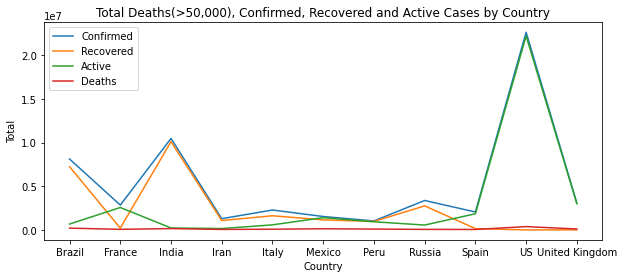

In [31]:
#setting up data for plotting
d = covid_df.query('Deaths > 50000')

plt.figure().set_figwidth(10)
plt.plot(d['Country_Region'], d['Confirmed'], label='Confirmed')
plt.plot(d['Country_Region'], d['Recovered'], label='Recovered')
plt.plot(d['Country_Region'], d['Active'], label='Active')
plt.plot(d['Country_Region'], d['Deaths'], label='Deaths')

plt.title('Total Deaths(>50,000), Confirmed, Recovered and Active Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total')
plt.legend()
plt.show()

### Plot Province/State wise Deaths in USA

In [41]:
import plotly.express as px

#covid_data was the original dataframe which was not grouped by country
data = covid_data[['Country_Region', 'Province_State', 'Deaths']].query('Country_Region == "US" ')

fig = px.bar(data, x='Province_State', y='Deaths',
      title='Total Deaths by Province/State in the USA')
fig.update_traces(marker_line_width = 0, textfont_size=12, textangle=0, textposition='outside', cliponaxis=False)
fig.update_layout(bargap=0, bargroupgap=0)
fig.show()

In [21]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [22]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

### Plot Province/State Wise Active Cases in USA

In [40]:
data = covid_data[['Country_Region', 'Province_State', 'Active']].query('Country_Region == "US" ')

fig = px.bar(data, x='Province_State', y='Active',
      title='Total Deaths by Province/State in the USA')
fig.update_traces(marker_line_width = 0, textfont_size=12, textangle=0, textposition='outside', cliponaxis=False)
fig.update_layout(bargap=0, bargroupgap=0)
fig.show()

### Plot Province/State Wise Confirmed cases in USA

In [24]:
data = covid_data.query('Country_Region == "US" ')

fig = px.bar(data, x='Province_State', y='Confirmed',
      title='Total Deaths by Province/State in the USA')
fig.update_traces(marker_line_width = 0, textfont_size=12, textangle=0, textposition='outside', cliponaxis=False)
fig.update_layout(bargap=0, bargroupgap=0) #to remove white lines across bars
fig.show()

### Plot Worldwide Confirmed Cases over time

In [25]:
import plotly.io as pio

In [26]:
covid_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-10 05:22:12,33.93911,67.709953,53400,2264,43740,7396,Afghanistan,137.175124,4.239700
1,NaN,NaN,NaN,Albania,2021-01-10 05:22:12,41.15330,20.168300,63033,1233,37327,24473,Albania,2190.318994,1.956118
2,NaN,NaN,NaN,Algeria,2021-01-10 05:22:12,28.03390,1.659600,101913,2803,69011,30099,Algeria,232.407243,2.750385
3,NaN,NaN,NaN,Andorra,2021-01-10 05:22:12,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-10 05:22:12,-11.20270,17.873900,18156,416,13205,4535,Angola,55.242049,2.291254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,NaN,NaN,Unknown,Ukraine,2021-01-10 05:22:12,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4008,NaN,NaN,NaN,Nauru,2021-01-10 05:22:12,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4009,NaN,NaN,Niue,New Zealand,2021-01-10 05:22:12,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4010,NaN,NaN,NaN,Tuvalu,2021-01-10 05:22:12,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


In [27]:
data2 = covid_data[['Country_Region', 'Confirmed', 'Last_Update']].groupby('Last_Update', as_index=False).sum()

fig=px.line(data2, x='Last_Update', y='Confirmed', title='Global Confirmed Cases Over Time')
fig.show()
